In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ahu14 = pd.read_csv('AHU_14.csv')
ahu14 = ahu14.ffill()
ahu14.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15
0,31-12-2015,00:00:00,18.0,OFF,1.9,76.0,OFF,76.2,0.0,74.0,75.7,20.0,78.3,20.0,20.0
1,31-12-2015,00:06:08,18.0,OFF,1.9,76.0,OFF,76.2,0.0,74.0,75.7,20.0,78.3,20.0,20.0
2,31-12-2015,00:06:37,18.0,OFF,1.9,76.0,OFF,76.2,0.0,74.0,75.7,20.0,78.3,20.0,20.0
3,31-12-2015,00:07:11,18.0,OFF,1.9,76.0,OFF,76.2,0.0,74.0,75.7,20.0,78.3,20.0,20.0
4,31-12-2015,00:08:19,18.0,OFF,1.9,76.0,OFF,76.2,0.0,74.0,75.7,20.0,78.3,20.0,20.0


In [3]:
ahu14.rename(columns={'Column1':'Date','Column2':'Time','Column3':'Return fan VFD speed','Column5':'Cooling coil valve %open',
                      'Column6':'Cold Deck temperature','Column7':'exhaust fans ON?OFF','Column8':'Hot Deck temperature',
                      'Column9':'Mixed air damper % open','Column10':'Mixed air temperature','Column11':'Pre-heat coil discharger temperature',
                      'Column12':'Pre-heat coil discharger valve','Column13':'Return air temperature','Column4':'supply fan ON?OFF',
                     'Column14':'Re-heat coil Discharger value','Column15':'supply fan VFD speed %'},inplace = True)
ahu14.head()

,Date,Time,Return fan VFD speed,supply fan ON?OFF,Cooling coil valve %open,Cold Deck temperature,exhaust fans ON?OFF,Hot Deck temperature,Mixed air damper % open,Mixed air temperature,Pre-heat coil discharger temperature,Pre-heat coil discharger valve,Return air temperature,Re-heat coil Discharger value,supply fan VFD speed %
0,31-12-2015,00:00:00,18.0,OFF,1.9,76.0,OFF,76.2,0.0,74.0,75.7,20.0,78.3,20.0,20.0
1,31-12-2015,00:06:08,18.0,OFF,1.9,76.0,OFF,76.2,0.0,74.0,75.7,20.0,78.3,20.0,20.0
2,31-12-2015,00:06:37,18.0,OFF,1.9,76.0,OFF,76.2,0.0,74.0,75.7,20.0,78.3,20.0,20.0
3,31-12-2015,00:07:11,18.0,OFF,1.9,76.0,OFF,76.2,0.0,74.0,75.7,20.0,78.3,20.0,20.0
4,31-12-2015,00:08:19,18.0,OFF,1.9,76.0,OFF,76.2,0.0,74.0,75.7,20.0,78.3,20.0,20.0


In [9]:
sup_on = ahu14[ahu14['supply fan ON?OFF'].str.contains('ON')]
sup_off = ahu14[ahu14['supply fan ON?OFF'].str.contains('OFF')]
data_temp = [ahu14['Cold Deck temperature'],ahu14['Hot Deck temperature'],ahu14['Mixed air temperature'],
            ahu14['Pre-heat coil discharger temperature'],ahu14['Return air temperature']]
data_temp_1 = [sup_on['Cold Deck temperature'],sup_on['Hot Deck temperature'],sup_on['Mixed air temperature'],
            sup_on['Pre-heat coil discharger temperature'],sup_on['Return air temperature']]
data_temp_2 = [sup_off['Cold Deck temperature'],sup_off['Hot Deck temperature'],sup_off['Mixed air temperature'],
            sup_off['Pre-heat coil discharger temperature'],sup_off['Return air temperature']]

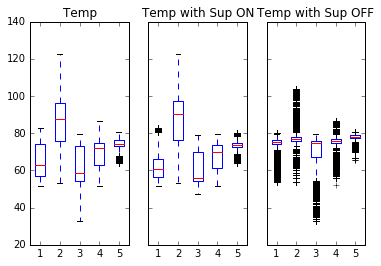

In [10]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_temp)
ax1.set_title('Temp')
ax2.boxplot(data_temp_1)
ax2.set_title('Temp with Sup ON')
ax3.boxplot(data_temp_2)
ax3.set_title('Temp with Sup OFF')
#plt.show()
plt.savefig(''.join(['Temp','_ahu14']))

In [11]:
data_value = [ahu14['Return fan VFD speed'],ahu14['Cooling coil valve %open'],ahu14['Mixed air damper % open'],
              ahu14['Pre-heat coil discharger valve'],ahu14['Re-heat coil Discharger value'],ahu14['supply fan VFD speed %']]
data_value_1 = [sup_on['Return fan VFD speed'],sup_on['Cooling coil valve %open'],sup_on['Mixed air damper % open'],
              sup_on['Pre-heat coil discharger valve'],sup_on['Re-heat coil Discharger value'],sup_on['supply fan VFD speed %']]
data_value_2 = [sup_off['Return fan VFD speed'],sup_off['Cooling coil valve %open'],sup_off['Mixed air damper % open'],
              sup_off['Pre-heat coil discharger valve'],sup_off['Re-heat coil Discharger value'],sup_off['supply fan VFD speed %']]

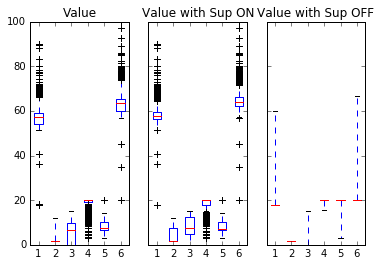

In [12]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey = True)
ax1.boxplot(data_value)
ax1.set_title('Value')
ax2.boxplot(data_value_1)
ax2.set_title('Value with Sup ON')
ax3.boxplot(data_value_2)
ax3.set_title('Value with Sup OFF')
#plt.show()
plt.savefig(''.join(['Value','_ahu14']))

In [14]:
df1 = ahu14.copy()
df1 = df1.drop(['Date','Time','supply fan ON?OFF','exhaust fans ON?OFF'],1)
ahu14.columns.values

array(['Date', 'Time', 'Return fan VFD speed', 'supply fan ON?OFF',
       'Cooling coil valve %open', 'Cold Deck temperature',
       'exhaust fans ON?OFF', 'Hot Deck temperature',
       'Mixed air damper % open', 'Mixed air temperature',
       'Pre-heat coil discharger temperature',
       'Pre-heat coil discharger valve', 'Return air temperature',
       'Re-heat coil Discharger value', 'supply fan VFD speed %'], dtype=object)

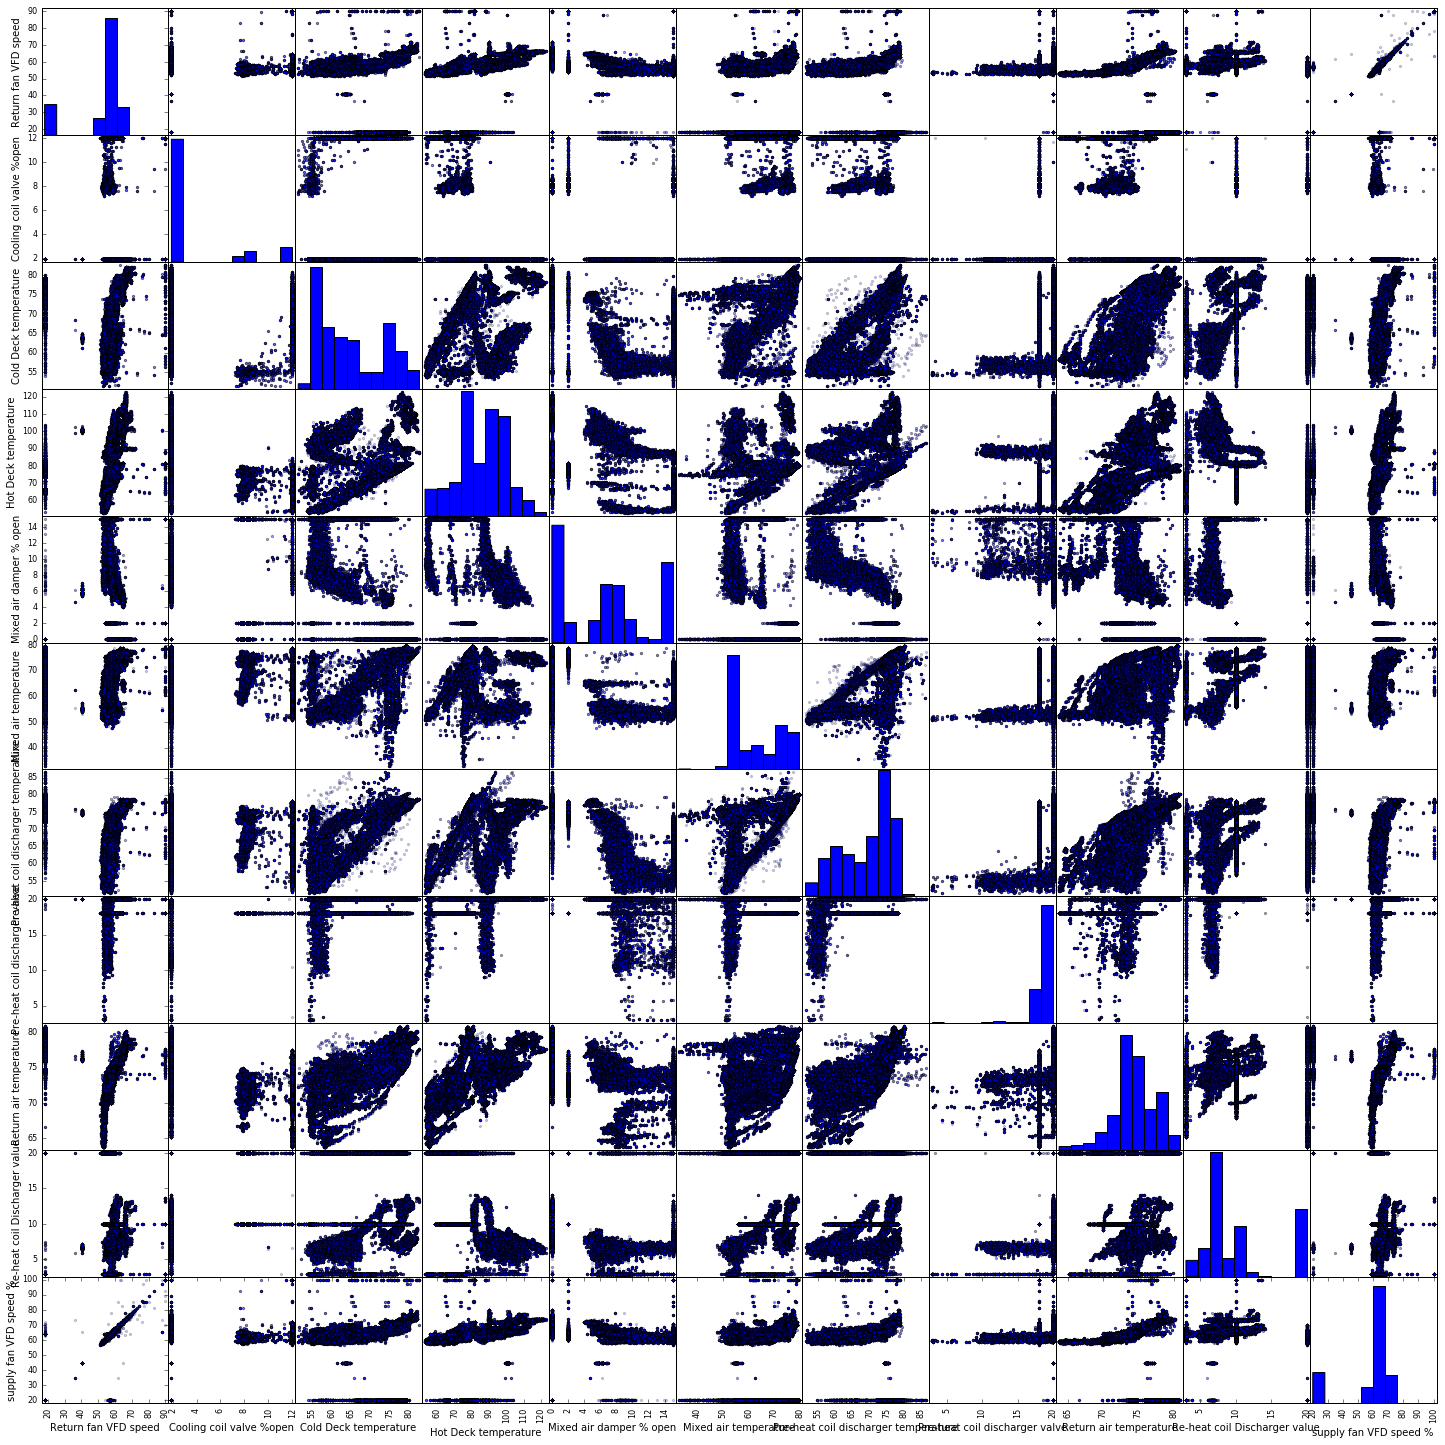

In [15]:
df = pd.scatter_matrix(df1, alpha = 0.2, figsize=(25,25))
plt.savefig(''.join(['bivariate','_ahu_14']))